# STAT 139 Project - Fall 2016 #
# Handwritten Digit Classification Using Image Data #
** Ming Long Wu, Qin Lyu, Hengte Lin **

In [1]:
import math
import time
import random
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.cross_validation import train_test_split
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression as LogReg
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
from sklearn.cross_validation import KFold
from sklearn.svm import SVC
%matplotlib inline

In [1]:
# --------------
# Code from Hengte
# --------------
# Define get_data
def get_data(train=200,test=100,maxnumber=9, norm = False):
    """
    train - number of train data for each digit
    test - number of tet data for each digit
    maxnumber - get digits from 0 to this number, default 0-9
    norm - perform normalization or not (-1 to 1)
    
    """
    x_train=[]
    y_train=[]
    x_test=[]
    y_test=[]
    for i in range(maxnumber+1):
        x = np.genfromtxt("data/mnist_digit_" +str(i) + ".csv",max_rows=test+train)
        x_train.append(x[0:train,:])
        y_train.append(np.array([i] * train))
        y_test.append(np.array([i] * test))
        x_test.append(x[-1:-test-1:-1,:])
    x_train = np.concatenate(x_train)
    x_test = np.concatenate(x_test)
    y_train = np.concatenate(y_train)
    y_test = np.concatenate(y_test)    
    if norm:
        x_train = normalizedData(x_train)
        x_test = normalizedData(x_test)

    return x_train, y_train,  x_test, y_test


def normalizedData(l):
	return 2*l / 255 - 1

### Preprocess data ###

In [4]:
# Load data
data_0 = np.loadtxt("mnist_digit_0.csv")
data_1 = np.loadtxt("mnist_digit_1.csv")
data_2 = np.loadtxt("mnist_digit_2.csv")
data_3 = np.loadtxt("mnist_digit_3.csv")
data_4 = np.loadtxt("mnist_digit_4.csv")
data_5 = np.loadtxt("mnist_digit_5.csv")
data_6 = np.loadtxt("mnist_digit_6.csv")
data_7 = np.loadtxt("mnist_digit_7.csv")
data_8 = np.loadtxt("mnist_digit_8.csv")
data_9 = np.loadtxt("mnist_digit_9.csv")


In [5]:
# Check data size
print(data_0.shape)
print(data_1.shape)
print(data_2.shape)
print(data_3.shape)
print(data_4.shape)
print(data_5.shape)
print(data_6.shape)
print(data_7.shape)
print(data_8.shape)
print(data_9.shape)


(5108, 784)
(5743, 784)
(4905, 784)
(5174, 784)
(4824, 784)
(4364, 784)
(4989, 784)
(5228, 784)
(4819, 784)
(4846, 784)


In [6]:
# Define show digits
def show_digits(in_data, in_ax, idx_row):
    for idx_col in range(4):
        tmp = np.reshape(in_data[idx_col*1000,:],(28,28))
        in_ax[idx_row,idx_col].imshow(tmp, cmap='gray')


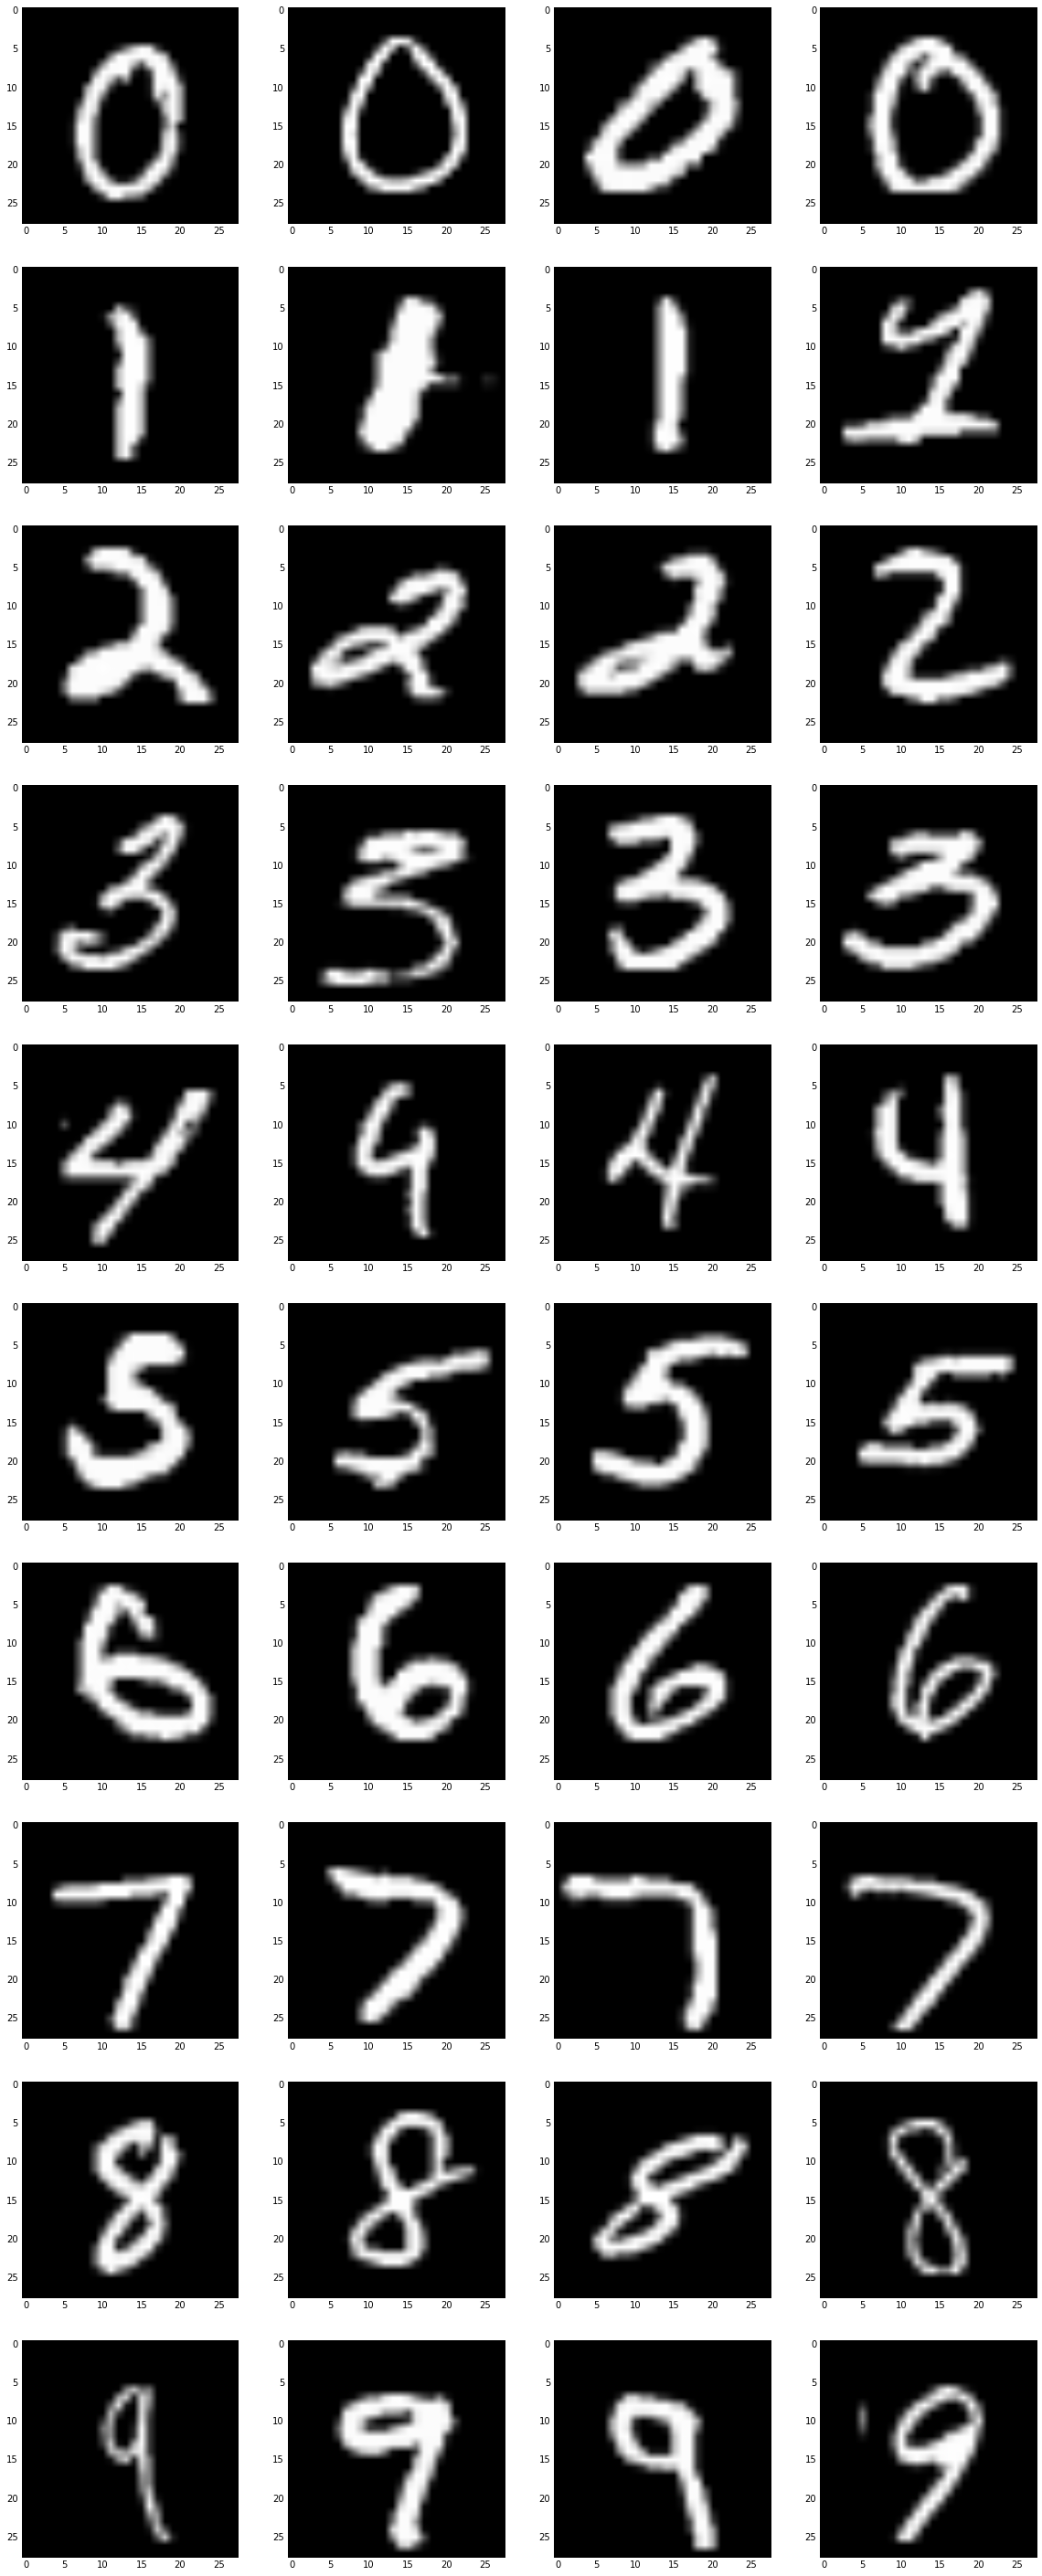

In [5]:
# Draw digits 0 - 9
fig1, ax1 = plt.subplots(10, 4, figsize=(20, 50))
show_digits(data_0, ax1, 0)
show_digits(data_1, ax1, 1)
show_digits(data_2, ax1, 2)
show_digits(data_3, ax1, 3)
show_digits(data_4, ax1, 4)
show_digits(data_5, ax1, 5)
show_digits(data_6, ax1, 6)
show_digits(data_7, ax1, 7)
show_digits(data_8, ax1, 8)
show_digits(data_9, ax1, 9)


In [7]:
# Generate xy for analysis
xy_0=np.append(data_0,np.ones((data_0.shape[0],1))*0,axis=1)
xy_1=np.append(data_1,np.ones((data_1.shape[0],1))*1,axis=1)
xy_2=np.append(data_2,np.ones((data_2.shape[0],1))*2,axis=1)
xy_3=np.append(data_3,np.ones((data_3.shape[0],1))*3,axis=1)
xy_4=np.append(data_4,np.ones((data_4.shape[0],1))*4,axis=1)
xy_5=np.append(data_5,np.ones((data_5.shape[0],1))*5,axis=1)
xy_6=np.append(data_6,np.ones((data_6.shape[0],1))*6,axis=1)
xy_7=np.append(data_7,np.ones((data_7.shape[0],1))*7,axis=1)
xy_8=np.append(data_8,np.ones((data_8.shape[0],1))*8,axis=1)
xy_9=np.append(data_9,np.ones((data_9.shape[0],1))*9,axis=1)


In [8]:
# Concatenate xy from 0 to 9
xy = np.concatenate((xy_0,xy_1,xy_2,xy_3,xy_4,\
                    xy_5,xy_6,xy_7,xy_8,xy_9),axis=0)
print(xy.shape)


(50000, 785)


In [9]:
# Randomly shuffle data in row
idx_ran=np.random.permutation(xy.shape[0])
xy=xy[idx_ran,:]
# Show first 10 y values
print(xy[0:10,784])
# Check if number of columns increases by 1
print(xy.shape)


[ 7.  6.  1.  8.  8.  7.  9.  6.  6.  4.]
(50000, 785)


### Principal Component Analysis (PCA) ###

In [10]:
# Split x and y
x=xy[:,0:-1]
y=xy[:,-1]

# Apply PCA to data and get the top 150 axes of maximum variation
num_com = 150
pca = PCA(n_components=num_com)
pca.fit(x)
print('Total variance explained: ' + str(sum(pca.explained_variance_ratio_[0:num_com])) + '%')

# Project to the data onto the three axes
x_pca = pca.transform(x)
print('Reduced x dimension:' + str(x_pca.shape))


Total variance explained: 0.950354177284%
Reduced x dimension:(50000, 150)


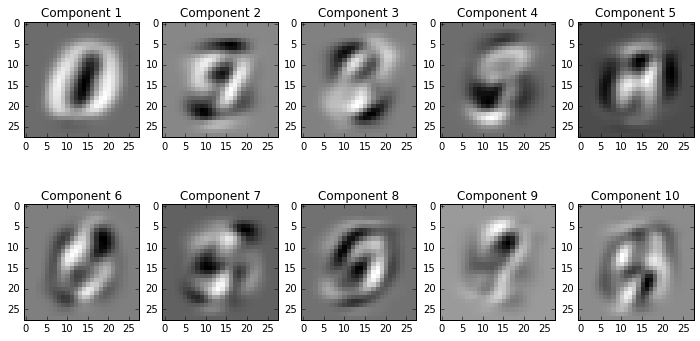

In [10]:
# Display the principal components of PCA as digital images
fig2, ax2 = plt.subplots(2, 5, figsize=(12, 6))
# COMPONENT 1
ax2[0, 0].imshow(pca.components_[0].reshape(28,28), cmap=plt.cm.gray_r, interpolation='nearest')
ax2[0, 0].set_title('Component 1')

# COMPONENT 2
ax2[0, 1].imshow(pca.components_[1].reshape(28,28), cmap=plt.cm.gray_r, interpolation='nearest')
ax2[0, 1].set_title('Component 2')

# COMPONENT 3
ax2[0, 2].imshow(pca.components_[2].reshape(28,28), cmap=plt.cm.gray_r, interpolation='nearest')
ax2[0, 2].set_title('Component 3')

# COMPONENT 4
ax2[0, 3].imshow(pca.components_[3].reshape(28,28), cmap=plt.cm.gray_r, interpolation='nearest')
ax2[0, 3].set_title('Component 4')

# COMPONENT 5
ax2[0, 4].imshow(pca.components_[4].reshape(28,28), cmap=plt.cm.gray_r, interpolation='nearest')
ax2[0, 4].set_title('Component 5')

# COMPONENT 6
ax2[1, 0].imshow(pca.components_[5].reshape(28,28), cmap=plt.cm.gray_r, interpolation='nearest')
ax2[1, 0].set_title('Component 6')

# COMPONENT 7
ax2[1, 1].imshow(pca.components_[6].reshape(28,28), cmap=plt.cm.gray_r, interpolation='nearest')
ax2[1, 1].set_title('Component 7')

# COMPONENT 8
ax2[1, 2].imshow(pca.components_[7].reshape(28,28), cmap=plt.cm.gray_r, interpolation='nearest')
ax2[1, 2].set_title('Component 8')

# COMPONENT 9
ax2[1, 3].imshow(pca.components_[8].reshape(28,28), cmap=plt.cm.gray_r, interpolation='nearest')
ax2[1, 3].set_title('Component 9')

# COMPONENT 10
ax2[1, 4].imshow(pca.components_[9].reshape(28,28), cmap=plt.cm.gray_r, interpolation='nearest')
ax2[1, 4].set_title('Component 10')


### Visualization by projection onto top 3 Principal Components (PCs) ###

Total variance explained in pc1: 0.235595630522%
Reduced x dimension in pca1:(50000, 3)


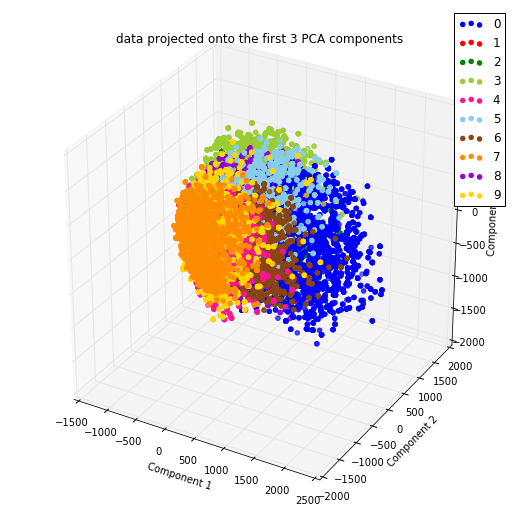

In [22]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.colors as colors

# Apply PCA to data and get the top 3 axes of maximum variation
pca1 = PCA(n_components=3)
pca1.fit(x)
print('Total variance explained in pc1: ' + str(sum(pca1.explained_variance_ratio_[0:3])) + '%')

# Project to the data onto the three axes
x_pca1 = pca1.transform(x)
print('Reduced x dimension in pca1:' + str(x_pca1.shape))

# Visualized our reduced data
# fig5, ax5 = plt.subplots(1, 1, figsize=(10, 10), projection='3d')
# ax1 = fig.add_subplot(1, 2, 1,  projection='3d')
fig5 = plt.figure(figsize=(7, 7))
ax5 = Axes3D(fig5)
# ax5 = fig5.add_subplot(111,  projection='3d')
ax5.scatter(x_pca1[y==0, 0], x_pca1[y==0, 1], x_pca1[y==0, 2], c='b', color='b', label='0')
ax5.scatter(x_pca1[y==1, 0], x_pca1[y==1, 1], x_pca1[y==1, 2], c='r', color='r', label='1')
ax5.scatter(x_pca1[y==2, 0], x_pca1[y==2, 1], x_pca1[y==2, 2], c='g', color='g', label='2')
ax5.scatter(x_pca1[y==3, 0], x_pca1[y==3, 1], x_pca1[y==3, 2], c='YellowGreen', color='YellowGreen', label='3')
ax5.scatter(x_pca1[y==4, 0], x_pca1[y==4, 1], x_pca1[y==4, 2], c='DeepPink', color='DeepPink', label='4')
ax5.scatter(x_pca1[y==5, 0], x_pca1[y==5, 1], x_pca1[y==5, 2], c='SkyBlue', color='SkyBlue', label='5')
ax5.scatter(x_pca1[y==6, 0], x_pca1[y==6, 1], x_pca1[y==6, 2], c='SaddleBrown', color='SaddleBrown', label='6')
ax5.scatter(x_pca1[y==7, 0], x_pca1[y==7, 1], x_pca1[y==7, 2], c='DarkOrange', color='DarkOrange', label='7')
ax5.scatter(x_pca1[y==8, 0], x_pca1[y==8, 1], x_pca1[y==8, 2], c='DarkViolet', color='DarkViolet', label='8')
ax5.scatter(x_pca1[y==9, 0], x_pca1[y==9, 1], x_pca1[y==9, 2], c='Gold', color='Gold', label='9')

ax5.set_xlabel('Component 1')
ax5.set_ylabel('Component 2')
ax5.set_zlabel('Component 3')
ax5.set_title('data projected onto the first 3 PCA components')
ax5.legend()


### Check normality of predictors in PCA reduced data ###

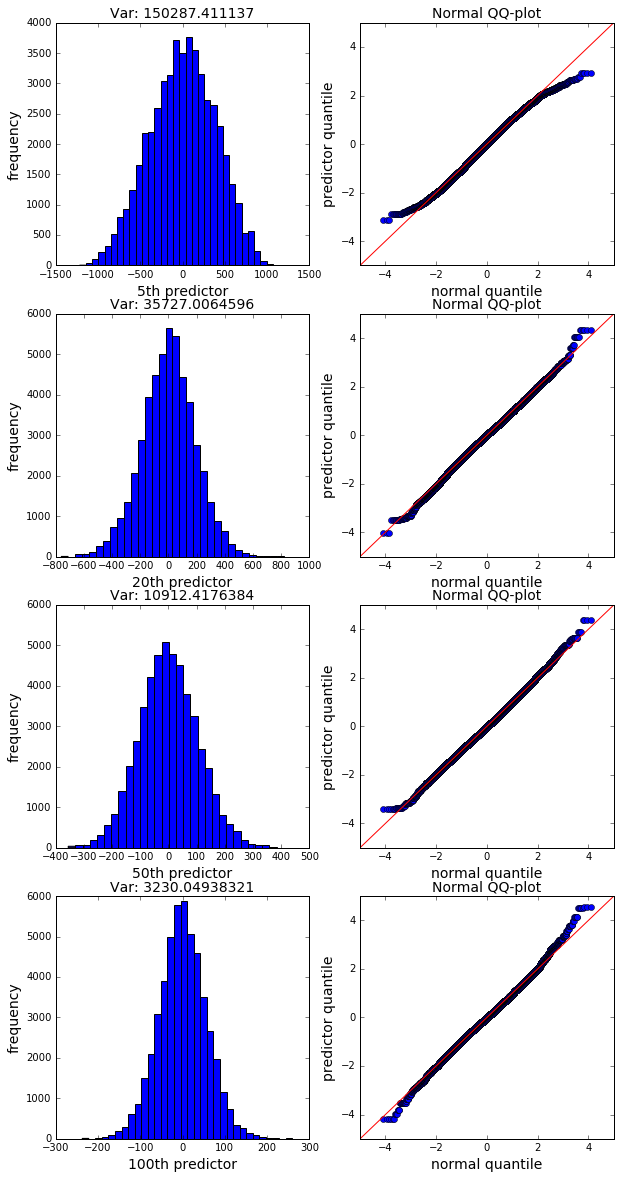

In [23]:
# Check normality of predictors in x_pca
fig3, ax3 = plt.subplots(4, 2, figsize=(10, 20))
# Choose 1st predictor
n1=5
ax3[0, 0].hist(x_pca[:,n1], bins = 32, facecolor = 'blue')
ax3[0, 0].set_xlabel('5th predictor', fontsize=14)
ax3[0, 0].set_ylabel('frequency', fontsize=14)
ax3[0, 0].set_title('Var: ' + str(np.var(x_pca[:,n1])), fontsize=14)

sm.qqplot(x_pca[:,n1],ax=ax3[0, 1], fit=True, line='45')
ax3[0, 1].set_xlabel('normal quantile', fontsize=14)
ax3[0, 1].set_ylabel('predictor quantile', fontsize=14)
ax3[0, 1].set_title('Normal QQ-plot', fontsize=14)

# Choose 2nd predictor
n2=20
ax3[1, 0].hist(x_pca[:,n2], bins = 32, facecolor = 'blue')
ax3[1, 0].set_xlabel('20th predictor', fontsize=14)
ax3[1, 0].set_ylabel('frequency', fontsize=14)
ax3[1, 0].set_title('Var: ' + str(np.var(x_pca[:,n2])), fontsize=14)

sm.qqplot(x_pca[:,n2],ax=ax3[1, 1], fit=True,line='45')
ax3[1, 1].set_xlabel('normal quantile', fontsize=14)
ax3[1, 1].set_ylabel('predictor quantile', fontsize=14)
ax3[1, 1].set_title('Normal QQ-plot', fontsize=14)

# Choose 3rd predictor
n3=50
ax3[2, 0].hist(x_pca[:,n3], bins = 32, facecolor = 'blue')
ax3[2, 0].set_xlabel('50th predictor', fontsize=14)
ax3[2, 0].set_ylabel('frequency', fontsize=14)
ax3[2, 0].set_title('Var: ' + str(np.var(x_pca[:,n3])), fontsize=14)

sm.qqplot(x_pca[:,n3],ax=ax3[2, 1], fit=True, line='45')
ax3[2, 1].set_xlabel('normal quantile', fontsize=14)
ax3[2, 1].set_ylabel('predictor quantile', fontsize=14)
ax3[2, 1].set_title('Normal QQ-plot', fontsize=14)

# Choose 4th predictor
n4=100
ax3[3, 0].hist(x_pca[:,n4], bins = 32, facecolor = 'blue')
ax3[3, 0].set_xlabel('100th predictor', fontsize=14)
ax3[3, 0].set_ylabel('frequency', fontsize=14)
ax3[3, 0].set_title('Var: ' + str(np.var(x_pca[:,n4])), fontsize=14)

sm.qqplot(x_pca[:,n4],ax=ax3[3, 1], fit=True, line='45')
ax3[3, 1].set_xlabel('normal quantile', fontsize=14)
ax3[3, 1].set_ylabel('predictor quantile', fontsize=14)
ax3[3, 1].set_title('Normal QQ-plot', fontsize=14)


### Randomly split data for training and testing ###

In [10]:
# Split train and test
x_train, x_test, y_train, y_test = train_test_split(x_pca, y, test_size=0.5, random_state=100)
print(x_train.shape)
print(x_test.shape)


(25000, 150)
(25000, 150)


In [11]:
# Check if y_train and y_test are multiclass
print('y_train unique values:' + str(np.unique(y_train)))
print('y_test unique values:' + str(np.unique(y_test)))


y_train unique values:[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9.]
y_test unique values:[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9.]


### Fit multiclass Logistic Regressio model ###

In [86]:
# Fit logistic regression model
start_time = time.time()
model_log01 = LogReg(n_jobs=10)
model_log01.fit(x_train, y_train)
compute_time = time.time() - start_time
print('Training accuracy: ' + str(model_log01.score(x_train,y_train)))
print('Testing accuracy: ' + str(model_log01.score(x_test,y_test)))
print('Time elapsed to fit multiclass logistic regression model: ' + str(compute_time))


Training accuracy: 0.93804
Testing accuracy: 0.93224
Time elapsed to fit multiclass logistic regression model: 228.7892758846283


### Fit LDA model ###

In [13]:
# Fit LDA
start_time = time.time()
model_lda01 = LDA()
model_lda01.fit(x_train, y_train)
compute_time = time.time() - start_time
print('Training accuracy: ' + str(model_lda01.score(x_train,y_train)))
print('Testing accuracy: ' + str(model_lda01.score(x_test,y_test)))
print('Time elapsed to fit LDA model: ' + str(compute_time))


Training accuracy: 0.8902
Testing accuracy: 0.88148
Time elapsed to fit LDA model: 0.20366477966308594


### Fit QDA model ###

In [15]:
# Fit QDA
start_time = time.time()
model_qda01 = QDA()
model_qda01.fit(x_train, y_train)
compute_time = time.time() - start_time
print('Training accuracy: ' + str(model_qda01.score(x_train,y_train)))
print('Testing accuracy: ' + str(model_qda01.score(x_test,y_test)))
print('Time elapsed to fit QDA model: ' + str(compute_time))


Training accuracy: 0.98436
Testing accuracy: 0.97524
Time elapsed to fit QDA model: 0.16164898872375488


### Cross validation and parameter tuning in QDA ###

In [43]:
# Cross validation for QDA
k = 5
kf = KFold(len(x_pca), n_folds=k)
C_s = np.power(10.0, np.arange(-6,2,1))
CV_scores = np.zeros([2, len(C_s)])

C_idx=0
for C_value in C_s:
    print('reg_param:' + str(C_value))
    validation_scores = np.zeros([2, 5])
    idx=0
    for train_index, test_index in kf:
        x_train_cv, x_test_cv = x_pca[train_index], x_pca[test_index]
        y_train_cv, y_test_cv = y[train_index], y[test_index]
        # build and fit logistic regression model
        model_QDA_cv = QDA(reg_param=C_s[C_idx])
        model_QDA_cv.fit(x_train_cv, y_train_cv)
        # get score for this iteration
        validation_scores[0,idx]=model_QDA_cv.score(x_train_cv, y_train_cv)
        validation_scores[1,idx]=model_QDA_cv.score(x_test_cv, y_test_cv)
        idx += 1
    # store average score for this C_value
    print(validation_scores)
    CV_scores[:,C_idx]=np.mean(validation_scores, axis=1)
    C_idx +=1

CV_QDA_scores = pd.DataFrame(CV_scores, columns=C_s, index=['train accuracy', 'test accuracy'])
CV_QDA_scores

reg_param:1e-06
[[ 0.98185   0.98235   0.98245   0.98235   0.982875]
 [ 0.9799    0.9759    0.9758    0.975     0.977   ]]
reg_param:1e-05
[[ 0.98185   0.98235   0.98245   0.98235   0.982875]
 [ 0.9799    0.9759    0.9758    0.975     0.977   ]]
reg_param:0.0001
[[ 0.98185   0.98235   0.98245   0.98235   0.982875]
 [ 0.9799    0.9759    0.9758    0.975     0.977   ]]
reg_param:0.001
[[ 0.98185   0.98235   0.98245   0.982475  0.982725]
 [ 0.9799    0.9759    0.9758    0.9751    0.977   ]]
reg_param:0.01
[[ 0.98185   0.98255   0.982425  0.98235   0.982725]
 [ 0.9799    0.9759    0.9758    0.975     0.977   ]]
reg_param:0.1
[[ 0.981325  0.981725  0.981225  0.982     0.9819  ]
 [ 0.9795    0.9755    0.9749    0.9747    0.9765  ]]
reg_param:1.0
[[ 0.8057    0.804925  0.806775  0.80585   0.807925]
 [ 0.8053    0.8079    0.8041    0.8101    0.8001  ]]
reg_param:10.0
[[ 0.10275   0.102675  0.102175  0.101525  0.101675]
 [ 0.0998    0.1001    0.1021    0.1047    0.1041  ]]


0.000001   0.000010   0.000100   0.001000   0.010000   \
train accuracy   0.982375   0.982375   0.982375    0.98237    0.98238   
test accuracy    0.976720   0.976720   0.976720    0.97674    0.97672   

                0.100000   1.000000   10.000000  
train accuracy   0.981635   0.806235    0.10216  
test accuracy    0.976220   0.805500    0.10216

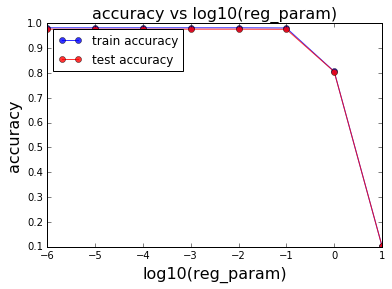

In [44]:
# Plot accuracy vs log10(reg_param)
fig4, ax4 = plt.subplots(1, 1, figsize=(6, 4))
# plot of data
ax4.plot(range(-6,2,1), 
        CV_QDA_scores.loc['train accuracy'].values, 
        'bo-', label = 'train accuracy', alpha = 0.8)
ax4.plot(range(-6,2,1), 
        CV_QDA_scores.loc['test accuracy'].values, 
        'ro-', label = 'test accuracy', alpha = 0.8)
ax4.set_xlabel('log10(reg_param)', fontsize=16)
ax4.set_ylabel('accuracy', fontsize=16)
ax4.set_title('accuracy vs log10(reg_param)', fontsize=16)
plt.legend(loc = 0, fontsize = 12);